In [35]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn import preprocessing

In [4]:
!unzip "train.csv.zip" 

Archive:  train.csv.zip
  inflating: train.csv               


In [5]:
!unzip "transactions.csv.zip" 

Archive:  transactions.csv.zip
  inflating: transactions.csv        


In [6]:
train = pd.read_csv('train.csv')
stores = pd.read_csv('stores.csv')
oil = pd.read_csv('oil.csv')
holidays = pd.read_csv('holidays_events.csv')
transactions = pd.read_csv('transactions.csv')

In [11]:
print("Train dataset information\n",train.info())
print("Stores dataset information\n",stores.info())
print("oil dataset information\n",oil.info())
print("Holidays dataset information\n",holidays.info())
print("Transactions dataset information\n",transactions.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
Train dataset information
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB
Stores dataset information
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non

In [19]:
# Identify total null values
print(train.isnull().sum())
print(stores.isnull().sum())
print(oil.isnull().sum())
print(holidays.isnull().sum())


id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64
date           0
dcoilwtico    43
dtype: int64
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


In [20]:
# Replace null values of oil with it's previous day values 
oil['dcoilwtico'] = oil['dcoilwtico'].fillna(oil['dcoilwtico'].shift(1))


In [24]:
oil.isnull().sum()

date          0
dcoilwtico    0
dtype: int64

In [28]:
# Transafer the date column to datetime datatype in every dataset containing date
train.date = pd.to_datetime(train.date)
oil.date=pd.to_datetime(oil.date)
holidays.date=pd.to_datetime(holidays.date)
transactions.date=pd.to_datetime(transactions.date)

### Univariate analysis

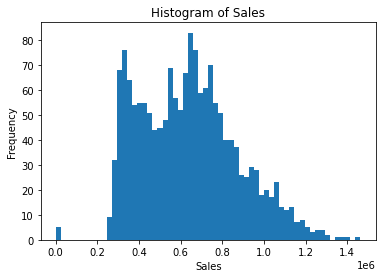

In [26]:
# Frequency of sales 

plt.hist(train.groupby('date')['sales'].sum(), bins=60)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Sales')
plt.show()

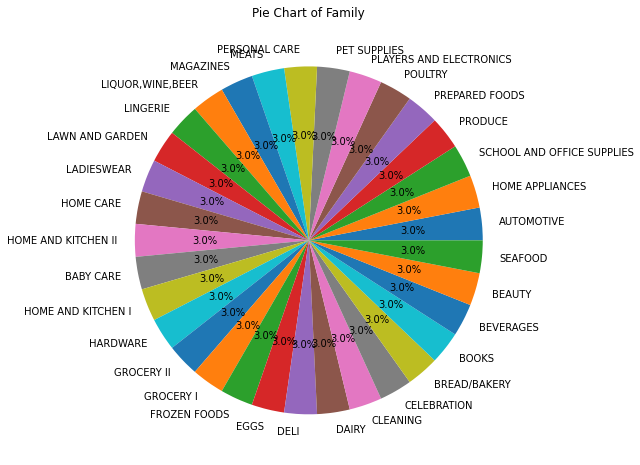

In [ ]:
counts = train['family'].value_counts()
labels = counts.index.tolist()
sizes = counts.values.tolist()
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Pie Chart of Family')
plt.show()

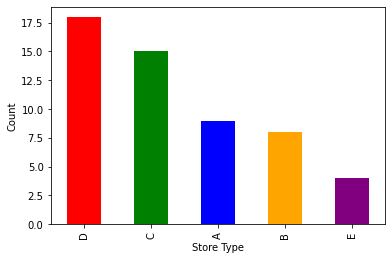

In [ ]:
# Count of each store type
colors = ['red', 'green', 'blue','orange','purple']
stores['type'].value_counts().plot(kind='bar',color=colors)
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.show()

<ipython-input-9-d36bebae7850>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('Set3',17)


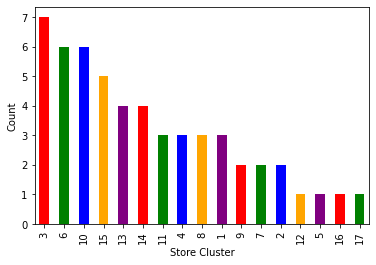

In [ ]:
# Count of different types of store cluster 
color_map = plt.cm.get_cmap('Set3',17)
stores['cluster'].value_counts().plot(kind='bar',color=colors)
plt.xlabel('Store Cluster')
plt.ylabel('Count')
plt.show()

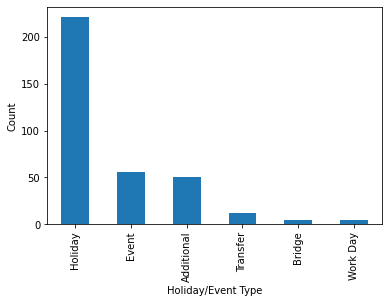

In [ ]:
# Count of holiday types
holidays['type'].value_counts().plot(kind='bar')
plt.xlabel('Holiday/Event Type')
plt.ylabel('Count')
plt.show()

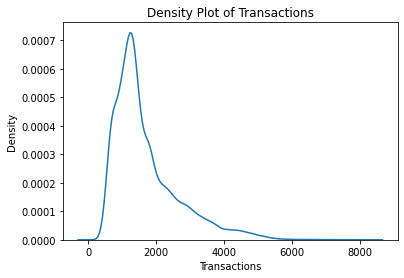

In [ ]:
# Density plot of transactions
sns.kdeplot(transactions['transactions'])
plt.xlabel('Transactions')
plt.title('Density Plot of Transactions')
plt.show()

## Multivariate analysis

<Axes: xlabel='date', ylabel='dcoilwtico'>

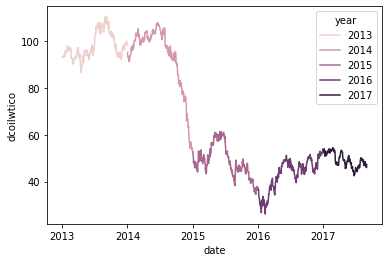

In [ ]:
# plot of oil price varaition with date
oil['date'] = pd.to_datetime(oil['date'])

# extract year from date column
oil['year'] = oil['date'].dt.year

# create line plot
sns.lineplot(data=oil, x='date', y='dcoilwtico', hue='year')

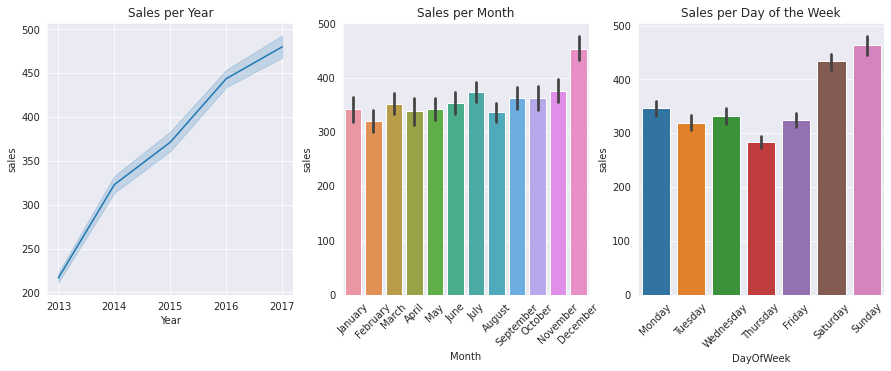

In [ ]:
# Extract year, month, and day of the week from the 'Date' column
train['Year'] = train['date'].dt.year
train['Month'] = train['date'].dt.month_name()
train['DayOfWeek'] = train['date'].dt.day_name()

# Set the plot style
sns.set_style('darkgrid')

# Create three subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot sales per year
sns.lineplot(ax=axes[0], data=data, x='Year', y='sales')
axes[0].set_title('Sales per Year')

# Plot sales per month
sns.barplot(ax=axes[1], data=data, x='Month', y='sales')
axes[1].set_title('Sales per Month')
axes[1].tick_params(axis='x', labelrotation=45)

# Plot sales per day of the week
sns.barplot(ax=axes[2], data=data, x='DayOfWeek', y='sales', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
axes[2].set_title('Sales per Day of the Week')
axes[2].tick_params(axis='x', labelrotation=45)

# Show the plot
plt.show()

### Merged data analysis

In [29]:
# Combining all the data
data = train
data = data.merge(stores, how="left", on='store_nbr')   
data = data.merge(oil, how="left", on='date')      
data = data.merge(transactions, how="left", on=['date','store_nbr'])  
data = data.merge(holidays,on='date',how='left')
data = data.rename(columns={'type_x' : 'store_type','type_y':'holiday_type'})

In [30]:
# Taking year, month, week, day of week in new columns
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['week'] = data['date'].dt.isocalendar().week
data['quarter'] = data['date'].dt.quarter
data['day_of_week'] = data['date'].dt.day_name()

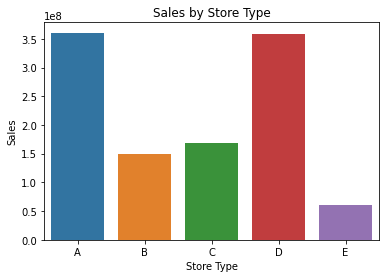

In [ ]:
# Sales by Store Type
sales_by_store_type = data.groupby('store_type')['sales'].sum().reset_index()
sns.barplot(x='store_type', y='sales', data=sales_by_store_type)
plt.title('Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()


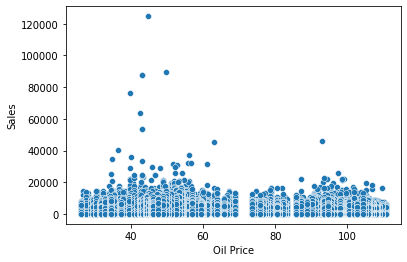

In [ ]:
# Oil Price vs. Sales
sns.scatterplot(x='dcoilwtico', y='sales', data=data)
plt.xlabel('Oil Price')
plt.ylabel('Sales')
plt.show()

In [ ]:
import plotly.graph_objs as go
sales_by_state = data.groupby('state')['sales'].sum().reset_index()
top_5_states = sales_by_state.sort_values('sales', ascending=False).head(5)

# create horizontal bar plot
fig = go.Figure(go.Bar(
            x=top_5_states['sales'],
            y=top_5_states['state'],
            orientation='h'))

fig.update_layout(title='Top 5 States by Sales in Ecuador',
                  xaxis_title='Total Sales',
                  yaxis_title='State')

fig.show()

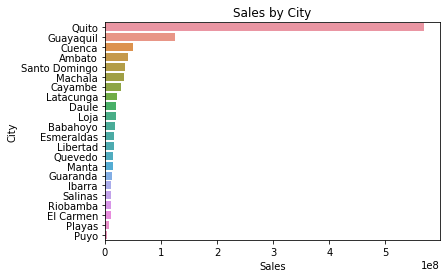

In [ ]:

# Sales by City
sales_by_city = data.groupby('city')['sales'].sum().reset_index()
sales_by_city = sales_by_city.sort_values(by='sales', ascending=False)
sns.barplot(x='sales', y='city', data=sales_by_city)
plt.title('Sales by City')
plt.xlabel('Sales')
plt.ylabel('City')
plt.show()


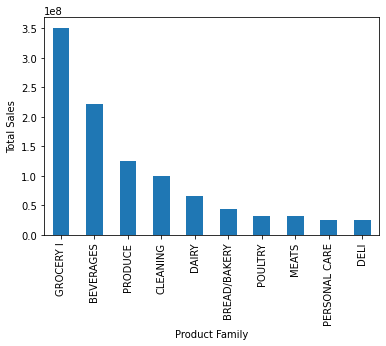

In [ ]:
sales_by_family = data.groupby('family')['sales'].sum()
sales_by_family = sales_by_family.sort_values(ascending=False)
top_families = sales_by_family[:10]
top_families.plot(kind='bar')
plt.xlabel('Product Family')
plt.ylabel('Total Sales')
plt.show()

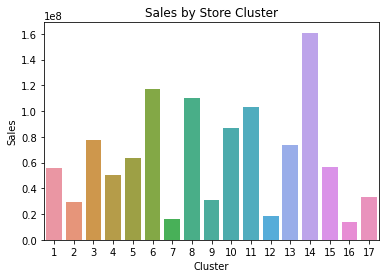

In [ ]:
# Sales by Store Cluster
sales_by_cluster = data.groupby('cluster')['sales'].sum().reset_index()
sns.barplot(x='cluster', y='sales', data=sales_by_cluster)
plt.title('Sales by Store Cluster')
plt.xlabel('Cluster')
plt.ylabel('Sales')
plt.show()

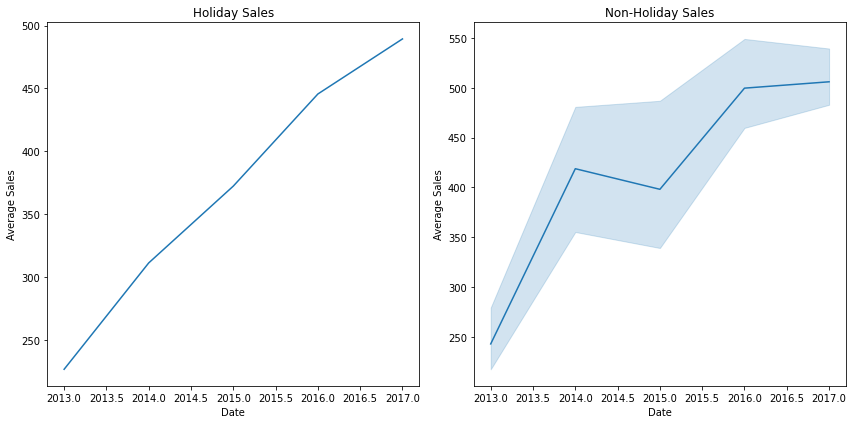

In [ ]:

# filter for holiday events only
sales_by_holiday = data.groupby(['holiday_type', 'year'])['sales'].mean().reset_index()
holiday_sales = sales_by_holiday.loc[sales_by_holiday['holiday_type'].str.contains('Holiday',na=False)]
non_holiday_sales = sales_by_holiday.loc[~sales_by_holiday['holiday_type'].str.contains('Holiday', na=False)]

# group by type and date and calculate average sales
#sales_by_holiday = holiday_sales.groupby(['type_y', 'year'])['sales'].mean().reset_index()

# create line plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.lineplot(x='year', y='sales', data=holiday_sales, ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Sales')
ax1.set_title('Holiday Sales')

sns.lineplot(x='year', y='sales', data=non_holiday_sales, ax=ax2)
ax2.set_xlabel('Date')
ax2.set_ylabel('Average Sales')
ax2.set_title('Non-Holiday Sales')

plt.tight_layout()
plt.show()

In [36]:
# Label encode the object type datatype
object_cols = data.select_dtypes(include='object')
cols= object_cols.columns
data[cols]=data[cols].apply(preprocessing.LabelEncoder().fit_transform)

In [37]:
data.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,...,holiday_type,locale,locale_name,description,transferred,year,month,week,quarter,day_of_week
0,0,2013-01-01,1,0,0.0,0,18,12,3,13,...,3,1,4,50,0,2013,1,1,1,5
1,1,2013-01-01,1,1,0.0,0,18,12,3,13,...,3,1,4,50,0,2013,1,1,1,5
2,2,2013-01-01,1,2,0.0,0,18,12,3,13,...,3,1,4,50,0,2013,1,1,1,5
3,3,2013-01-01,1,3,0.0,0,18,12,3,13,...,3,1,4,50,0,2013,1,1,1,5
4,4,2013-01-01,1,4,0.0,0,18,12,3,13,...,3,1,4,50,0,2013,1,1,1,5


In [39]:
# Save the merged data to use it in the next stages
data.to_csv('merged_data.zip', index=False)  